In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# setting plot style for all the plots
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('laptops.csv',encoding='latin-1')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head(1)

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                    Cpu  Ram     Memory                           Gpu  OpSys  \
0  Intel Core i5 2.3GHz  8GB  128GB SSD  Intel Iris Plus Graphics 640  macOS   

   Weight  Price_euros  
0  1.37kg      1339.69

In [5]:
df=df.rename(columns={'Price_euros':'Price','OpSys':'OS','ScreenResolution':'Resolution'})

[Text(0, 0.5, 'Nb of computer'), Text(0.5, 0, 'Price')]

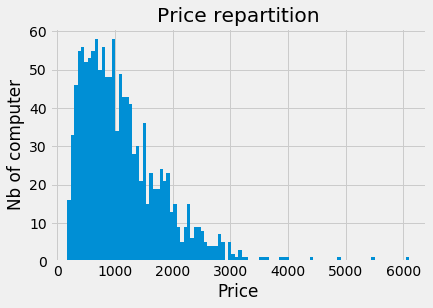

In [6]:
plt0=df.Price.hist(bins=100)
plt.title('Price repartition')
plt0.set(xlabel = 'Price', ylabel='Nb of computer')

## Company

[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car company')]

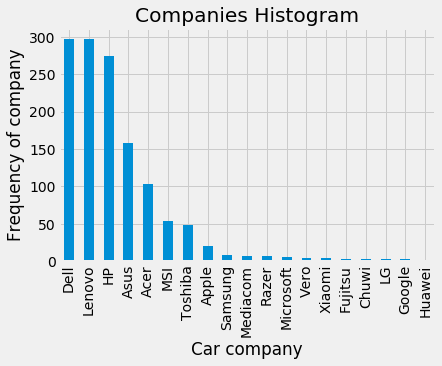

In [7]:
plt1 = df.Company.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

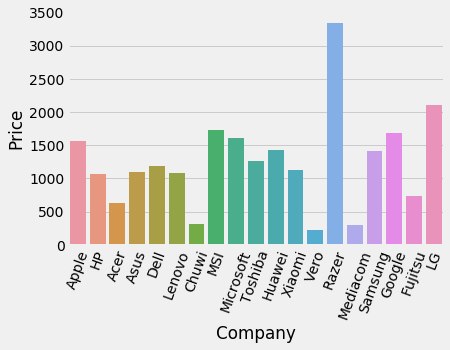

In [8]:
sns.barplot(x='Company',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

## Type Name

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

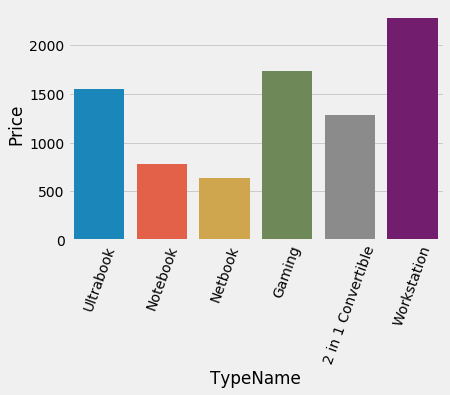

In [9]:
sns.barplot(x='TypeName',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

## Inches

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

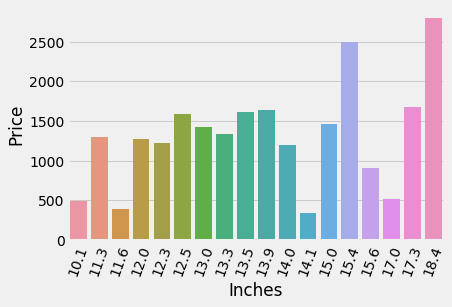

In [10]:
sns.barplot(x='Inches',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

In [11]:
convert={'Inches':str}
df=df.astype(convert)

## Product

In [12]:
df=df.drop('Product',axis=1)

## Resolution

In [13]:
Resolution=df['Resolution']
df['Full HD']=np.where(Resolution.str.contains('Full HD'),1,0)
df['IPS']=np.where(Resolution.str.contains('IPS'),1,0)
df['Touchscreen']=np.where(Resolution.str.contains('Touchscreen'),1,0)
df['4KUltraHD']=np.where(Resolution.str.contains('4K Ultra UD'),2,0)
df['QuadHD+']=np.where(Resolution.str.contains('Quad HD+'),3,0)
df['Retina']=np.where(Resolution.str.contains('Retina'),1,0)
df['Screenqual']=df['Full HD']+df['4KUltraHD']+df['QuadHD+']

In [14]:
resolution={'1920x1080':2073600,'1366x768':1049088,'1600x900':1440000,'3200x1800':5760000,'3840x2160':8294400,'2560x1440':3686400,'2304x1440':3317760,'2560x1600':4096000,'1920x1200':2304000,'2880x1800':5184000,
            '1440x900':1296000,'2400x1600':3840000,'2160x1440':3110400,'2736x1824':4990464,' 1366x768':1049088,'2256x1504':3393024}

In [15]:
df['resol']=df['Resolution'].str.extract(r'(.{0,9})$')

In [16]:
df.resol = df.resol.map(resolution)

In [17]:
df=df.drop('Resolution',axis=1)
df=df.drop('Full HD',axis=1)
df=df.drop('4KUltraHD',axis=1)
df=df.drop('QuadHD+',axis=1)

## RAM

In [18]:
df.Ram=df.Ram.str.replace('GB','')

## Memory

In [19]:
df['HDD']=np.where(df.Memory.str.contains('HDD'),1,0)
df['SSD']=np.where(df.Memory.str.contains('SSD'),1,0)
df['Flash']=np.where(df.Memory.str.contains('Flash Storage'),1,0)
df.Memory=df.Memory.str.replace("1\.0",'1')
df.Memory=df.Memory.str.replace('GB SSD','')
df.Memory=df.Memory.str.replace('GB HDD','')
df.Memory=df.Memory.str.replace('TB HDD','000')
df.Memory=df.Memory.str.replace('TB SSD','000')
df.Memory=df.Memory.str.replace('TB Hybrid','000')
df.Memory=df.Memory.str.replace('GB Hybrid','')
df.Memory=df.Memory.str.replace('GB Flash Storage','')
df.Memory=df.Memory.str.replace(' ','')

In [20]:
df[['M1','M2']] = df.Memory.str.split("+",expand=True,)

In [21]:
df.M2.fillna(0,inplace=True)

In [22]:
convert={'M1':int,'M2':int}
df=df.astype(convert)

In [23]:
df['Memory']=df['M1']+df['M2']

In [24]:
df=df.drop('M1',axis=1)
df=df.drop('M2',axis=1)

## Weight

In [25]:
df.Weight=df.Weight.str.replace('kg','')

## OS

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

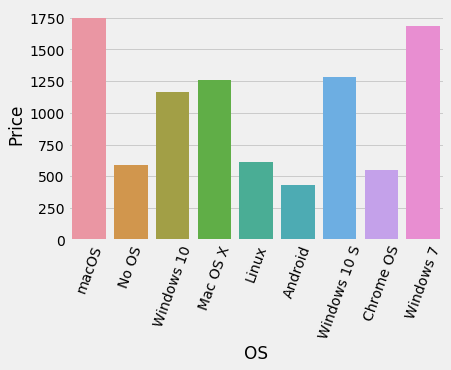

In [26]:
sns.barplot(x='OS',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

## Gpu

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 <a list of 110 Text xticklabel objects>)

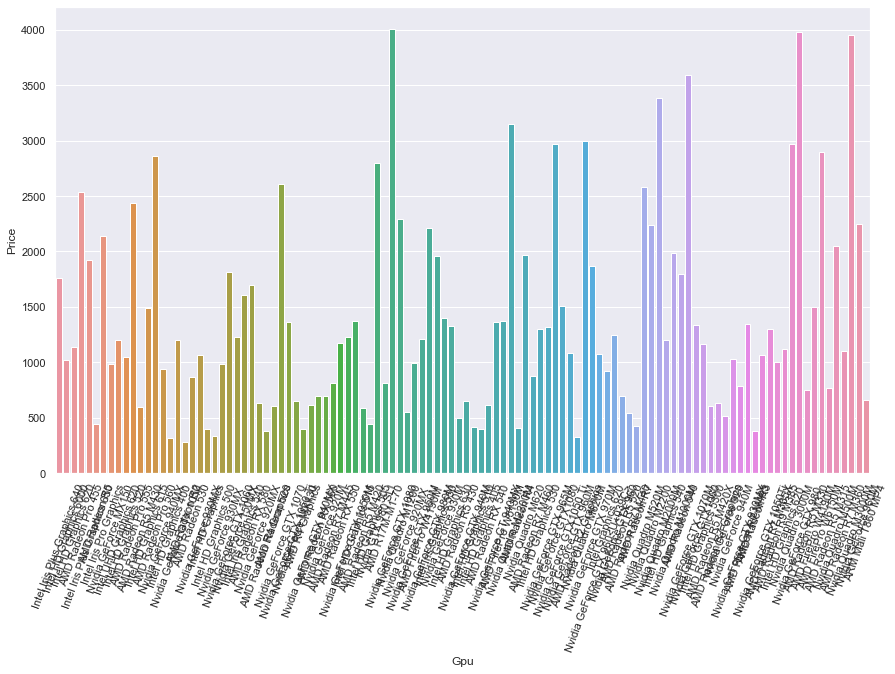

In [27]:
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(x='Gpu',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

In [28]:
df['Gpu'] = df['Gpu'].map(lambda x: x.rstrip('1234567890'))

In [29]:
df['Gpu'] = df['Gpu'].map(lambda x: x.rstrip('Ti 1234567890MX<>U+'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

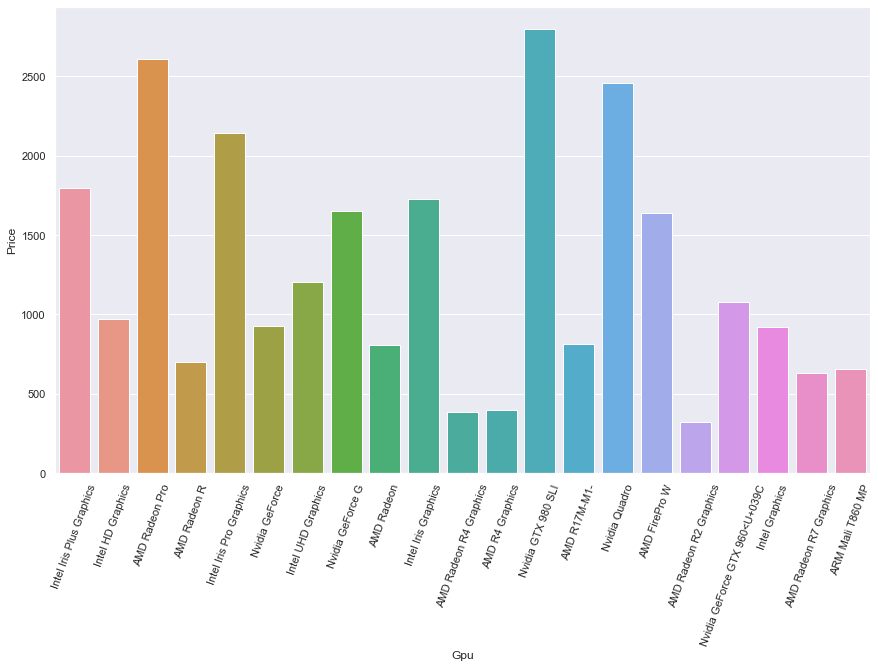

In [30]:
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(x='Gpu',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

## Cpu

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]),
 <a list of 118 Text xticklabel objects>)

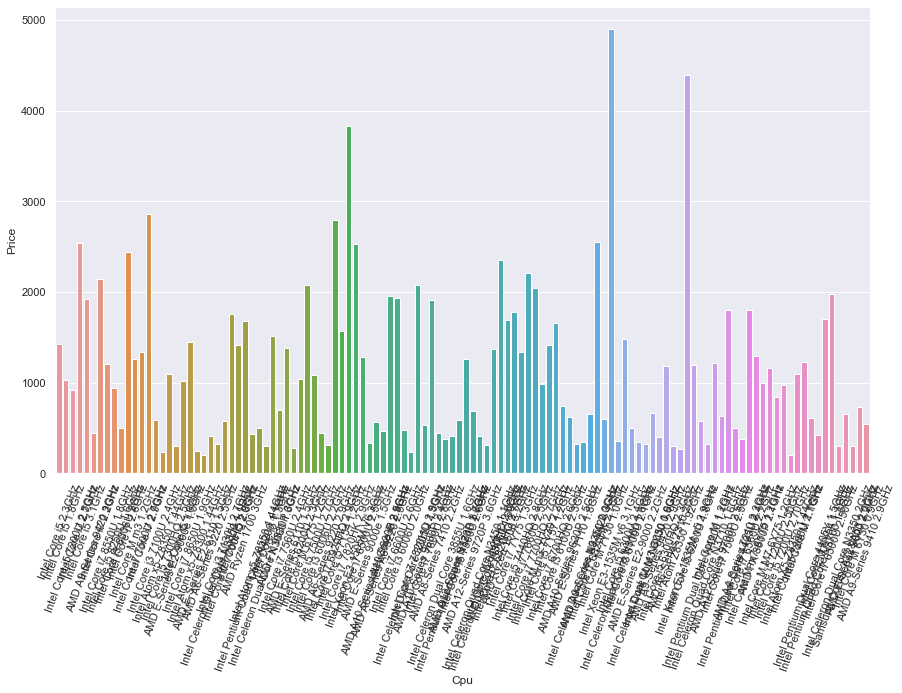

In [31]:
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(x='Cpu',y='Price',data=df,ci=None)
plt.xticks(rotation=70)

In [32]:
df['Ghz']=df['Cpu'].str.extract(r'(.{0,7})$')

In [33]:
df['Ghz'].value_counts()

 2.5GHz    290
 2.8GHz    165
 2.7GHz    165
 1.6GHz    133
 2.3GHz     86
 1.8GHz     78
 2.6GHz     76
6U 2GHz     64
 1.1GHz     53
 2.4GHz     52
 2.9GHz     21
 2.0GHz     19
 1.2GHz     15
20 3GHz     13
1.44GHz     12
 2.2GHz     11
 1.5GHz     10
 1.3GHz      6
 3.6GHz      5
 0.9GHz      4
 3.1GHz      3
00 3GHz      3
 2.1GHz      3
2.50GHz      3
 1.9GHz      2
V6 3GHz      2
50 2GHz      2
 3.2GHz      1
1.92GHz      1
0P 3GHz      1
1.60GHz      1
2.70GHz      1
10 2GHz      1
 1.0GHz      1
Name: Ghz, dtype: int64

In [34]:
df['Ghz']=df['Ghz'].str.replace('GHz','')

In [35]:
df['Ghz'] = df['Ghz'].map(lambda x: x.lstrip('1234567890UPV'))

In [36]:
df['Cpu']=np.where(df.Cpu.str.contains('Intel Core i3'),'Intel Core i3',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Core i5'),'Intel Core i5',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Core i7'),'Intel Core i7',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Core M'),'Intel Core i7',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Atom'),'Intel Atom',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Pentium'),'Intel Pentium',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Celeron'),'Intel Celeron',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Intel Xeon'),'Intel Core Xeon',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A9'),'AMD A9',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A10'),'AMD A10',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A8'),'AMD A8',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A12'),'AMD A12',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A6'),'AMD A6',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD A4'),'AMD A4',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD FX'),'AMD FX',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD E-Series'),'AMD E-Series',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('AMD Ryzen'),'AMD Ryzen',df.Cpu)
df['Cpu']=np.where(df.Cpu.str.contains('Samsung Cortex'),'Samsung Cortex',df.Cpu)

In [37]:
convert={'Ram':int,'Memory':int,'Ghz':float,'Weight':float}
df=df.astype(convert)

#### Dummies

In [38]:
TypeName_df=pd.get_dummies(df['TypeName'], drop_first=True)
TypeName_df.columns=['TypeName'+i for i in TypeName_df]
df=pd.concat([df,TypeName_df],axis=1)
df=df.drop('TypeName',axis=1)

In [39]:
Inches_df=pd.get_dummies(df['Inches'], drop_first=True)
Inches_df.columns=['Inches'+i for i in Inches_df]
df=pd.concat([df,Inches_df],axis=1)
df=df.drop('Inches',axis=1)

In [40]:
OS_df=pd.get_dummies(df['OS'], drop_first=True)
OS_df.columns=['OS'+i for i in OS_df]
df=pd.concat([df,OS_df],axis=1)
df=df.drop('OS',axis=1)

In [41]:
Gpu_df=pd.get_dummies(df['Gpu'], drop_first=True)
Gpu_df.columns=['Gpu'+i for i in Gpu_df]
df=pd.concat([df,Gpu_df],axis=1)
df=df.drop('Gpu',axis=1)

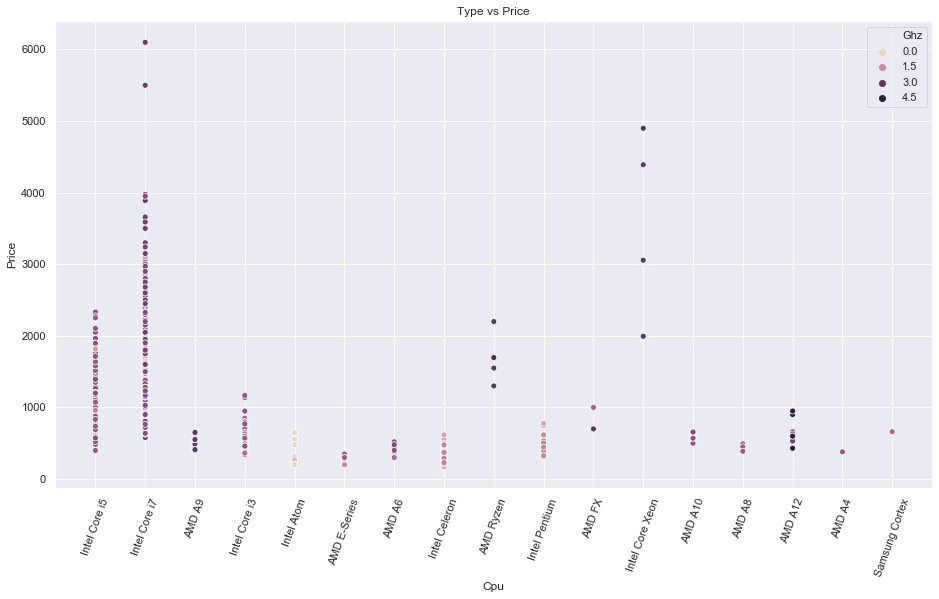

<Figure size 936x576 with 0 Axes>

In [42]:
plt.figure(figsize=(14,8))

plt.title('Type vs Price')
sns.scatterplot(x=df['Cpu'],y=df['Price'],hue=df['Ghz'])
plt.xlabel('Cpu')
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()
plt.tight_layout()

In [43]:
Cpu_df=pd.get_dummies(df['Cpu'], drop_first=True)
Cpu_df.columns=['Cpu'+i for i in Cpu_df]
df=pd.concat([df,Cpu_df],axis=1)
df=df.drop('Cpu',axis=1)

In [44]:
Company_df=pd.get_dummies(df['Company'], drop_first=True)
Company_df.columns=['Company'+i for i in Company_df]
df=pd.concat([df,Company_df],axis=1)
df=df.drop('Company',axis=1)

In [45]:
df.shape

(1303, 97)

## Final Dataset

In [46]:
df

Ram  Memory  Weight    Price  IPS  Touchscreen  Retina  Screenqual  \
0       8     128    1.37  1339.69    1            0       1           0   
1       8     128    1.34   898.94    0            0       0           0   
2       8     256    1.86   575.00    0            0       0           1   
3      16     512    1.83  2537.45    1            0       1           0   
4       8     256    1.37  1803.60    1            0       1           0   
...   ...     ...     ...      ...  ...          ...     ...         ...   
1298    4     128    1.80   638.00    1            1       0           1   
1299   16     512    1.30  1499.00    1            1       0           3   
1300    2      64    1.50   229.00    0            0       0           0   
1301    6    1000    2.19   764.00    0            0       0           0   
1302    4     500    2.20   369.00    0            0       0           0   

        resol  HDD  ...  CompanyLG  CompanyLenovo  CompanyMSI  \
0     4096000    0  ...          0              0           0   
1     1296000    0  ...          0              0           0   
2     2073600    0  ...          0              0           0   
3     5184000    0  ...          0              0           0   
4     4096000    0  ...          0              0           0   
...       ...  ...  ...        ...            ...         ...   
1298  2073600    0  ...          0              1           0   
1299  5760000    0  ...          0              1           0   
1300  1049088    0  ...          0              1           0   
1301  1049088    1  ...          0              0           0   
1302  1049088    1  ...          0              0           0   

      CompanyMediacom  CompanyMicrosoft  CompanyRazer  CompanySamsung  \
0                   0                 0             0               0   
1                   0                 0             0               0   
2                   0                 0             0               0   
3                   0                 0             0               0   
4                   0                 0             0               0   
...               ...               ...           ...             ...   
1298                0                 0             0               0   
1299                0                 0             0               0   
1300                0                 0             0               0   
1301                0                 0             0               0   
1302                0                 0             0               0   

      CompanyToshiba  CompanyVero  CompanyXiaomi  
0                  0            0              0  
1                  0            0              0  
2                  0            0              0  
3                  0            0              0  
4                  0            0              0  
...              ...          ...            ...  
1298               0            0              0  
1299               0            0              0  
1300               0            0              0  
1301               0            0              0  
1302               0            0              0  

[1303 rows x 97 columns]

In [47]:
X=df.drop('Price',axis=1)
y=df.Price

# Data Preprocessing

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
Xf=scaler.transform(X)

In [52]:
XF=pd.DataFrame(Xf,columns=X.columns)

In [53]:
XF

Ram    Memory    Weight  IPS  Touchscreen  Retina  Screenqual  \
0     0.096774  0.047923  0.169576  1.0          0.0     1.0    0.000000   
1     0.096774  0.047923  0.162095  0.0          0.0     0.0    0.000000   
2     0.096774  0.099042  0.291771  0.0          0.0     0.0    0.333333   
3     0.225806  0.201278  0.284289  1.0          0.0     1.0    0.000000   
4     0.096774  0.099042  0.169576  1.0          0.0     1.0    0.000000   
...        ...       ...       ...  ...          ...     ...         ...   
1298  0.032258  0.047923  0.276808  1.0          1.0     0.0    0.333333   
1299  0.225806  0.201278  0.152120  1.0          1.0     0.0    1.000000   
1300  0.000000  0.022364  0.201995  0.0          0.0     0.0    0.000000   
1301  0.064516  0.396166  0.374065  0.0          0.0     0.0    0.000000   
1302  0.032258  0.196486  0.376559  0.0          0.0     0.0    0.000000   

         resol  HDD  SSD  ...  CompanyLG  CompanyLenovo  CompanyMSI  \
0     0.420536  0.0  1.0  ...        0.0            0.0         0.0   
1     0.034079  0.0  0.0  ...        0.0            0.0         0.0   
2     0.141403  0.0  1.0  ...        0.0            0.0         0.0   
3     0.570702  0.0  1.0  ...        0.0            0.0         0.0   
4     0.420536  0.0  1.0  ...        0.0            0.0         0.0   
...        ...  ...  ...  ...        ...            ...         ...   
1298  0.141403  0.0  1.0  ...        0.0            1.0         0.0   
1299  0.650201  0.0  1.0  ...        0.0            1.0         0.0   
1300  0.000000  0.0  0.0  ...        0.0            1.0         0.0   
1301  0.000000  1.0  0.0  ...        0.0            0.0         0.0   
1302  0.000000  1.0  0.0  ...        0.0            0.0         0.0   

      CompanyMediacom  CompanyMicrosoft  CompanyRazer  CompanySamsung  \
0                 0.0               0.0           0.0             0.0   
1                 0.0               0.0           0.0             0.0   
2                 0.0               0.0           0.0             0.0   
3                 0.0               0.0           0.0             0.0   
4                 0.0               0.0           0.0             0.0   
...               ...               ...           ...             ...   
1298              0.0               0.0           0.0             0.0   
1299              0.0               0.0           0.0             0.0   
1300              0.0               0.0           0.0             0.0   
1301              0.0               0.0           0.0             0.0   
1302              0.0               0.0           0.0             0.0   

      CompanyToshiba  CompanyVero  CompanyXiaomi  
0                0.0          0.0            0.0  
1                0.0          0.0            0.0  
2                0.0          0.0            0.0  
3                0.0          0.0            0.0  
4                0.0          0.0            0.0  
...              ...          ...            ...  
1298             0.0          0.0            0.0  
1299             0.0          0.0            0.0  
1300             0.0          0.0            0.0  
1301             0.0          0.0            0.0  
1302             0.0          0.0            0.0  

[1303 rows x 96 columns]

In [54]:
Xf

array([[0.09677419, 0.04792332, 0.16957606, ..., 0.        , 0.        ,
        0.        ],
       [0.09677419, 0.04792332, 0.16209476, ..., 0.        , 0.        ,
        0.        ],
       [0.09677419, 0.09904153, 0.29177057, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02236422, 0.20199501, ..., 0.        , 0.        ,
        0.        ],
       [0.06451613, 0.39616613, 0.37406484, ..., 0.        , 0.        ,
        0.        ],
       [0.03225806, 0.19648562, 0.3765586 , ..., 0.        , 0.        ,
        0.        ]])

## FILTER Method

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression
selection=SelectKBest(f_regression, k=35).fit(XF,y)
X_two=selection.transform(XF)

#### ANALYZE

In [56]:
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error

In [57]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_two, y, test_size=0.20,random_state=41)

In [59]:
reg_model=LinearRegression().fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred),"MAE:",mean_absolute_error(y_test, y_pred),'MAPE:',MAPE(y_test, y_pred))

R2: 0.8023750091973108 MAE: 227.79778585226506 MAPE: 23.846867142684044


In [60]:
y_pred[y_pred<0]

array([], dtype=float64)

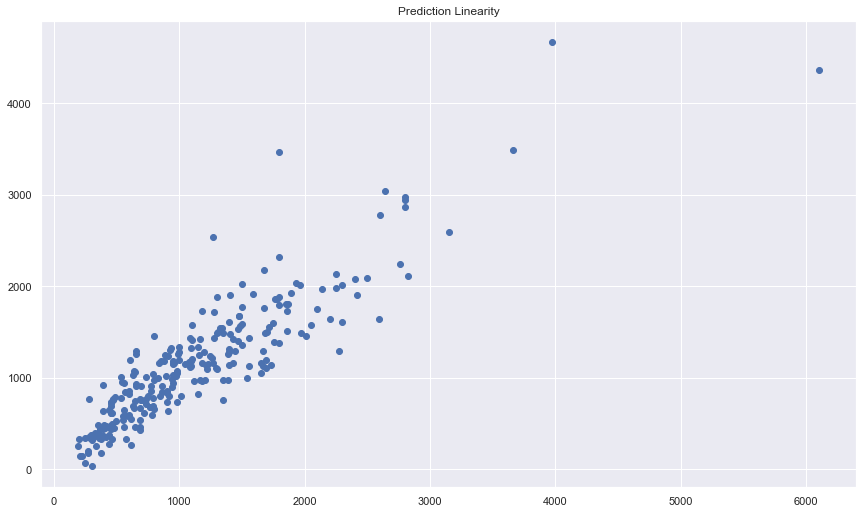

-16.77633570932279


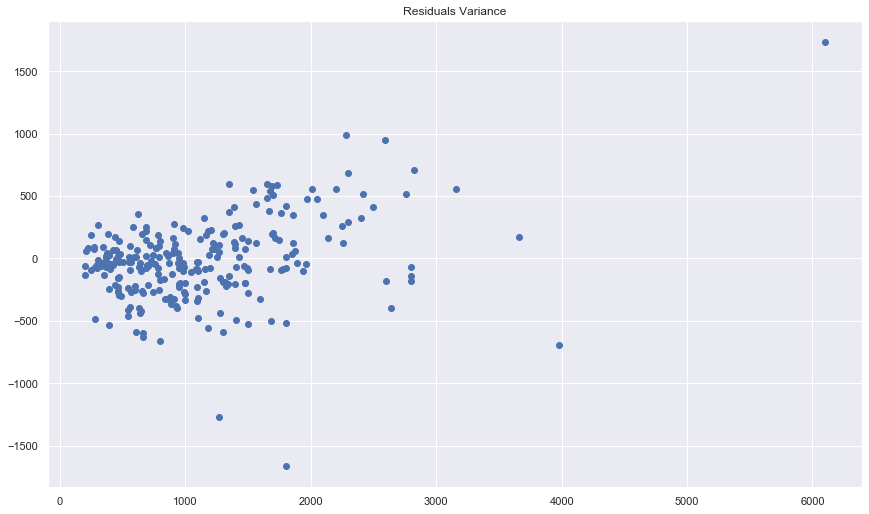

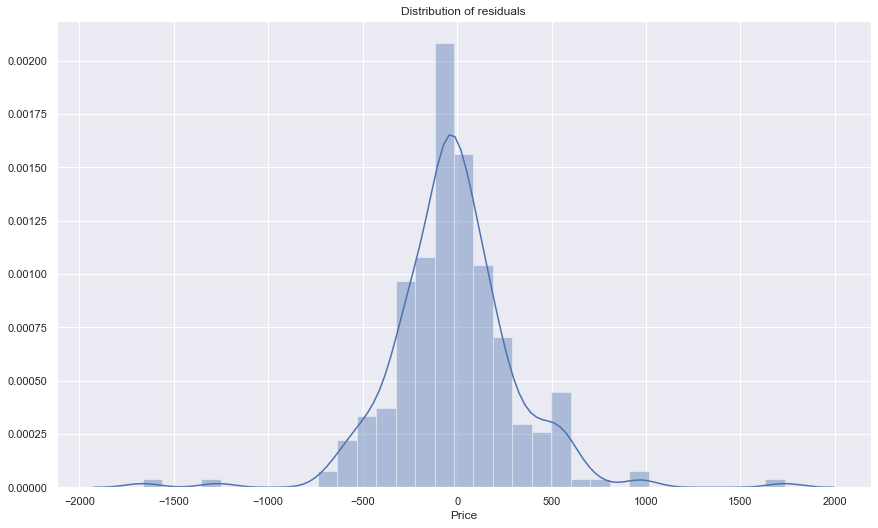

In [61]:
# Checking predictions
plt.scatter(y_test,y_pred)
plt.title('Prediction Linearity')
plt.show()

# Checking residuals
resid=y_test-y_pred

print(resid.mean())
plt.scatter(y_test,resid)
plt.title('Residuals Variance')
plt.show()

sns.distplot(resid)
plt.title('Distribution of residuals')
plt.show()

In [62]:
rid_model=RidgeCV().fit(X_train,y_train)
y_pred1 = rid_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred1),"MAE:",mean_absolute_error(y_test, y_pred1),'MAPE:',MAPE(y_test, y_pred1))

R2: 0.8034613448233227 MAE: 227.14394592274417 MAPE: 23.824029941654036


In [63]:
lass_model=LassoCV().fit(X_train,y_train)
y_pred2 = lass_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred2),"MAE:",mean_absolute_error(y_test, y_pred2),'MAPE:',MAPE(y_test, y_pred2))

R2: 0.8067384797825368 MAE: 224.592375460696 MAPE: 23.55802495728227


## WARPPERS Method

### RFE

In [64]:
from sklearn.feature_selection import RFE

In [65]:
estimator=LinearRegression()

In [66]:
selector=RFE(estimator,35)

In [67]:
selector.fit(XF,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=35, step=1, verbose=0)

In [68]:
selector.support_

array([ True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True, False])

In [69]:
A=list(XF.columns[selector.support_])

In [70]:
X_three=pd.DataFrame(XF[A])

#### ANALYZE

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_three, y, test_size=0.20,random_state=41)

In [72]:
reg_model=LinearRegression().fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred),"MAE:",mean_absolute_error(y_test, y_pred),'MAPE:',MAPE(y_test, y_pred))

R2: 0.7848342101599146 MAE: 240.29264413630602 MAPE: 25.728066821405122


In [73]:
rid_model=RidgeCV().fit(X_train,y_train)
y_pred1 = rid_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred1),"MAE:",mean_absolute_error(y_test, y_pred1),'MAPE:',MAPE(y_test, y_pred1))

R2: 0.7875923756278009 MAE: 238.44365355405418 MAPE: 25.523147425675834


In [74]:
lass_model=LassoCV().fit(X_train,y_train)
y_pred2 = lass_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred2),"MAE:",mean_absolute_error(y_test, y_pred2),'MAPE:',MAPE(y_test, y_pred2))

R2: 0.7855792162579208 MAE: 238.21679924280764 MAPE: 25.32418727776592


# DATA WITHOUT APPLE:

In [75]:
i=df[df['CompanyApple']==1].index
df1=df.drop(i)
df1=df1.drop('CompanyApple', axis=1)
Xa=df1.drop('Price',axis=1)
ya=df1.Price

In [76]:
scaler = MinMaxScaler()
scaler.fit(Xa)
X2=scaler.transform(Xa)

In [77]:
selection=SelectKBest(f_regression, k=25).fit(X2,ya)
X_four=selection.transform(X2)

C:\Users\galic156685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\galic156685\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\galic156685\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\galic156685\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_four, ya, test_size=0.20,random_state=41)

In [79]:
reg_model=LinearRegression().fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred),"MAE:",mean_absolute_error(y_test, y_pred),'MAPE:',MAPE(y_test, y_pred))

R2: 0.8029483349348466 MAE: 248.5772413625023 MAPE: 26.659679559570176


In [80]:
rid_model=RidgeCV().fit(X_train,y_train)
y_pred1 = rid_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred1),"MAE:",mean_absolute_error(y_test, y_pred1),'MAPE:',MAPE(y_test, y_pred1))

R2: 0.803462609325773 MAE: 248.1951770791571 MAPE: 26.617031623021475


In [81]:
lass_model=LassoCV().fit(X_train,y_train)
y_pred2 = lass_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred2),"MAE:",mean_absolute_error(y_test, y_pred2),'MAPE:',MAPE(y_test, y_pred2))

R2: 0.8010852781400583 MAE: 247.57708778843602 MAPE: 26.247200386845243


# Assumptions

The best model is a linear regression with the 35 best columns 

In [82]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [83]:
Xf=pd.DataFrame(X_two)
Xf

0         1         2    3    4         5         6    7    8   \
0     0.096774  0.047923  0.169576  1.0  0.0  0.000000  0.420536  0.0  1.0   
1     0.096774  0.047923  0.162095  0.0  0.0  0.000000  0.034079  0.0  0.0   
2     0.096774  0.099042  0.291771  0.0  0.0  0.333333  0.141403  0.0  1.0   
3     0.225806  0.201278  0.284289  1.0  0.0  0.000000  0.570702  0.0  1.0   
4     0.096774  0.099042  0.169576  1.0  0.0  0.000000  0.420536  0.0  1.0   
...        ...       ...       ...  ...  ...       ...       ...  ...  ...   
1298  0.032258  0.047923  0.276808  1.0  1.0  0.333333  0.141403  0.0  1.0   
1299  0.225806  0.201278  0.152120  1.0  1.0  1.000000  0.650201  0.0  1.0   
1300  0.000000  0.022364  0.201995  0.0  0.0  0.000000  0.000000  0.0  0.0   
1301  0.064516  0.396166  0.374065  0.0  0.0  0.000000  0.000000  1.0  0.0   
1302  0.032258  0.196486  0.376559  0.0  0.0  0.000000  0.000000  1.0  0.0   

       9   ...   25   26   27   28   29   30   31   32   33   34  
0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1298  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1299  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1300  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1301  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1302  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1303 rows x 35 columns]

In [85]:
sm.OLS(y,add_constant(Xf)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        14:16:29   Log-Likelihood:                -9322.5
No. Observations:                1303   AIC:                         1.872e+04
Df Residuals:                    1267   BIC:                         1.890e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        536.7254     99.126      5.415      0.000     342.256     731.195
0           3320.2197    167.162     19.862      0.000    2992.275    3648.164
1             39.0344     94.265      0.414      0.679    -145.898     223.967
2            362.2936    124.490      2.910      0.004     118.064     606.523
3              5.2513     21.814      0.241      0.810     -37.545      48.048
4            -32.3792     39.806     -0.813      0.416    -110.472      45.713
5           -194.6507     53.677     -3.626      0.000    -299.956     -89.346
6            573.8967     57.841      9.922      0.000     460.422     687.371
7            -11.6821     46.073     -0.254      0.800    -102.070      78.705
8            135.4607     36.220      3.740      0.000      64.403     206.519
9            -93.5968     65.509     -1.429      0.153    -222.115      34.922
10           269.0444     77.038      3.492      0.000     117.908     420.180
11           -62.8925     72.053     -0.873      0.383    -204.250      78.465
12          -166.3595     49.305     -3.374      0.001    -263.089     -69.630
13            72.8367     47.471      1.534      0.125     -20.293     165.967
14           185.7986    108.416      1.714      0.087     -26.896     398.493
15          -171.1711     74.336     -2.303      0.021    -317.006     -25.337
16          -239.1246     31.743     -7.533      0.000    -301.398    -176.851
17           -29.7991     54.494     -0.547      0.585    -136.707      77.109
18           -98.6063     91.748     -1.075      0.283    -278.602      81.389
19          -160.7100     80.222     -2.003      0.045    -318.093      -3.327
20          -227.2931     78.791     -2.885      0.004    -381.868     -72.719
21           -66.5211     66.773     -0.996      0.319    -197.518      64.476
22           217.7792     81.851      2.661      0.008      57.201     378.357
23           -45.3168     38.589     -1.174      0.240    -121.022      30.389
24           143.8173     26.124      5.505      0.000      92.566     195.069
25           102.5033     48.289      2.123      0.034       7.769     197.238
26           640.7849    100.194      6.395      0.000     444.221     837.348
27          -254.6352    107.101     -2.378      0.018    -464.750     -44.520
28          -245.4342     53.807     -4.561      0.000    -350.994    -139.874
29           856.8043    174.350      4.914      0.000     514.758    1198.851
30          -144.7395     32.788     -4.414      0.000    -209.065     -80.414
31           126.5389     24.282      5.211      0.000      78.902     174.176
32          -177.7132     67.138     -2.647      0.008    -309.427     -46.000
33            87.6984     53.159      1.650      0.099     -16.592     191.989
34           940.7700    126.036      7.464      0.000     693.507    1188.033
==

In [86]:
class Assumption_Tester_OLS:
    """
    X - Pandas DataFrame with numerical values. Independent Variable
    y - Series with numerical values. Dependent Variable
    
    Tests a linear regression on the model to see if assumptions are being met

    """
    
    from sklearn.linear_model import LinearRegression
    
    def __init__(self, X,y):
        from numpy import ndarray
        from pandas import concat
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series

        if type(X) == ndarray:
            self.features = ['X'+str(feature+1) for feature in range(X.shape[1])]
        elif type(X) == DataFrame:
            self.features=X.columns.to_list()
        else:
            print('Expected numpy array or pandas dataframe as X')
            return
        if type(y) == ndarray:
            self.output = 'y'
        elif type(y) == DataFrame:
            self.output=y.columns[0]
        elif type(y) == Series:
            self.output=y.name
        else:
            print('Expected numpy array or pandas dataframe as X')
            return

        self.X = X.values if type(X)==DataFrame else X
        self.y=y.iloc[:,0].values if type(y)==DataFrame else y.values if type(y)==Series else y
        
        self.model='not built yet'
        self.r2=0
        self.results={'Satisfied':[],'Potentially':[],'Violated':[]}
    
    def fit_model(self):
        from sklearn.linear_model import LinearRegression
        
        print('Fitting linear regression')        
        
        #Multi-threading when needed
        if self.X.shape[0] > 100000:
            self.model = LinearRegression(n_jobs=-1)
        else:
            self.model = LinearRegression()
        self.model.fit(self.X, self.y)
        
        self.predictions = self.model.predict(self.X)
        self.resid = self.y - self.predictions
        
        
    def build_model(self):
        self.fit_model()
        
        # Returning linear regression R^2 and coefficients before performing diagnostics
        self.r2 = self.model.score(self.X, self.y)
        print()
        print('R^2:', self.r2, '\n')
        print('Coefficients')
        print('-------------------------------------')
        print('Intercept:', self.model.intercept_)
        for idx,feature in enumerate(self.model.coef_):
            print(f'{self.features[idx]}: {round(feature,2)}')

    def linearity(self):
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        from pandas import concat
        from numpy import arange
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series        
        import seaborn as sns
        sns.set()
        import matplotlib.pyplot as plt
        
        if type(self.model)==str:
            self.fit_model()
        
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.regplot(self.y,self.predictions, fit_reg=False)
        
        # Plotting the diagonal line
        line_coords = arange(min(self.y.min(),self.predictions.min()), max(self.y.max(),self.predictions.max()))
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term \n\t\tor using box-cox transformation to make X or y follow normal distribution')
        
        print('\n\n\nBuilding a correlation table')
        print('\n=======================================================================================')
        df=concat([DataFrame(self.X),Series(self.y)],axis=1)
        df.columns=self.features+[self.output]
        df_corr=df[df.nunique()[df.nunique()>2].index].corr()[self.output].drop(self.output)
        
        print(f'\nParameters that are most likely VIOLATE linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)<0.25])

        print(f'\nParameters that are most likely FOLLOW linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)>=0.25])
        
        
        if df_corr[abs(df_corr)<0.25].shape[0]==0:
            self.results['Satisfied'].append('Linearity')
        elif df_corr[abs(df_corr)>=0.25].shape[0]==0:
            self.results['Violated'].append('Linearity')
        else:
            self.results['Potentially'].append('Linearity')
        
    def multicollinearity(self):
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
        import matplotlib.pyplot as plt
        import seaborn as sns
        from pandas.core.frame import DataFrame
        sns.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 2: Little to no multicollinearity among predictors')
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(DataFrame(self.X, columns=self.features).corr(), annot=len(self.features)<10, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
        plt.title('Correlation of Variables')
        plt.show()
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
        # Gathering the VIF for each variable
        vifs = {i:VIF(self.X, idx) for idx,i in enumerate(self.features)}
        vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
        for key, vif in vifs.items():
            print(f'{key}: {vif}')
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in vifs.values() if vif > 10])
        definite_multicollinearity = sum([1 for vif in vifs.values() if vif > 100])
        print()
        print(f'{possible_multicollinearity} cases of possible multicollinearity')
        print(f'{definite_multicollinearity} cases of definite multicollinearity')
        print()
        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
                self.results['Satisfied'].append('Multicollinearity')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
                self.results['Potentially'].append('Multicollinearity')

        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
            self.results['Violated'].append('Multicollinearity')
            

    
    def autocorrelation(self):
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson        
        
        if type(self.model)==str:
            self.fit_model()
        print('\n=======================================================================================')
        print('Assumption 3: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(self.resid)
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            self.results['Satisfied'].append('Autocorrelation')
            

    def homoskedasticity(self,p_value_thresh=0.05):
        """
        Homoskedasticity: Assumes that the errors exhibit constant variance
        """
        
        from statsmodels.stats.diagnostic import het_breuschpagan
        
        import matplotlib.pyplot as plt
        import seaborn
        from numpy import repeat
        seaborn.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 4: Homoskedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=range(self.X.shape[0]), y=self.resid, alpha=0.5)
        plt.plot(repeat(0, self.X.shape[0]), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroskedasticity is apparent, confidence intervals and predictions will be affected')        
        print('\nConsider removing outliers and preprocessing features - nonlinear transformation can help')
        
        lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
        display({lnames[idx]:het_breuschpagan(self.resid,self.X)[idx] for idx in range(4)})
        if het_breuschpagan(self.resid,self.X)[3] < p_value_thresh:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption potentially not satisfied', '\n')
            self.results['Potentially'].append('Autocorrelation')
        else:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption satisfied', '\n')
            self.results['Satisfied'].append('Autocorrelation')

       
        
    def normality_resid(self,p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        from scipy.stats import probplot
        import pylab
        import matplotlib.pyplot as plt
        import seaborn as sns
        from numpy import quantile,logical_or
        sns.set()

        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 5: The error terms are kinda normally distributed')
        print()
        print('Using the Anderson-Darling test for normal distribution')
        # Performing the test on the residuals
        p_value = normal_ad(self.resid)[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(self.resid)
        plt.show()
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
            self.results['Satisfied'].append('Normality')
        else:
            print('Assumption not satisfied')
            self.results['Violated'].append('Normality')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
    
    
        print('Building a probability plot')
        quantiles=probplot(self.resid, dist='norm', plot=pylab);
        plt.show()
        qqq=(quantiles[0][1]-quantiles[0][1].mean())/quantiles[0][1].std()-quantiles[0][0]
        q75=quantile(qqq,0.75)
        q25=quantile(qqq,0.25)

        outliers_share=(logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()/qqq.shape[0]).round(3)
        if outliers_share<0.005:
            print('Assumption can be considered as satisfied.')
            self.results['Satisfied'].append('Sub-Normality')
        elif outliers_share<0.05:
            self.results['Potentially'].append('Sub-Normality')
            print(f'\nIn your dataset you quite fat tails. You have {outliers_share} potential outliers ({logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()} rows)')
        else:
            print(f'\nIn fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.')
            self.results['Violated'].append('Sub-Normality')


    def run_all(self):
        self.build_model()
        self.linearity()
        self.multicollinearity()
        self.autocorrelation()
        self.homoskedasticity()
        self.normality_resid()
        display(self.results)

In [87]:
assumptions = Assumption_Tester_OLS(X_two,y)

Fitting linear regression

R^2: 0.8034994453525404 

Coefficients
-------------------------------------
Intercept: 536.7253883757633
X1: 3320.22
X2: 39.03
X3: 362.29
X4: 5.25
X5: -32.38
X6: -194.65
X7: 573.9
X8: -11.68
X9: 135.46
X10: -93.6
X11: 269.04
X12: -62.89
X13: -166.36
X14: 72.84
X15: 185.8
X16: -171.17
X17: -239.12
X18: -29.8
X19: -98.61
X20: -160.71
X21: -227.29
X22: -66.52
X23: 217.78
X24: -45.32
X25: 143.82
X26: 102.5
X27: 640.78
X28: -254.64
X29: -245.43
X30: 856.8
X31: -144.74
X32: 126.54
X33: -177.71
X34: 87.7
X35: 940.77

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


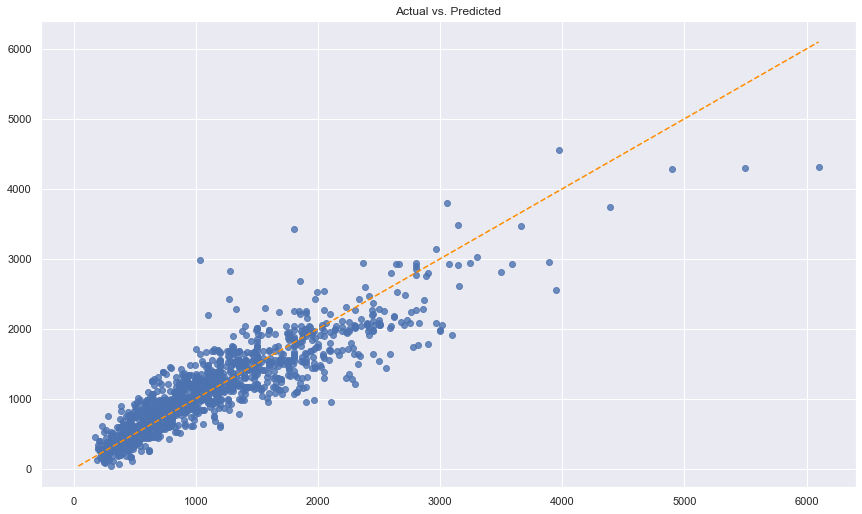

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Price


X2    0.160819
X3    0.210370
X6    0.244547
Name: Price, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with Price


X1     0.743007
X7     0.515486
X11    0.419933
Name: Price, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


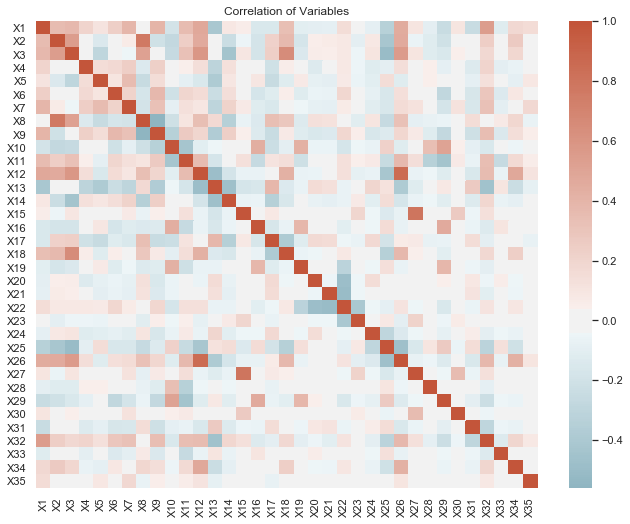

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X22: 31.07155160457613
X3: 27.72983045269171
X11: 24.77136487207192
X13: 15.228568393592747
X8: 11.819904676509982
X2: 10.88967228260976
X12: 10.534736002047389
X9: 9.840501322817312
X17: 6.791064782824965
X1: 6.390300698102446
X26: 5.617025665275065
X18: 4.891561610580787
X25: 4.393794267273475
X6: 3.609969982554217
X15: 3.3745746300452653
X14: 3.2899111560277063
X32: 3.2592283698711966
X27: 3.1506159587825855
X20: 2.949239683576331
X21: 2.930214962011738
X10: 2.7007480646438253
X7: 2.681469070837835
X5: 2.6669114684281547
X29: 2.5591744394493117
X23: 2.241133844784818
X19: 1.9573069105466305
X16: 1.7942883826444818
X4: 1.719757671311007
X34: 1.5442602173855289
X24: 1.5230513681740219
X28: 1.4764478502563094
X31: 1.4745158453797573
X33: 1.3473460559897088
X30: 1.2255765235125837
X35: 1.1265680590533078

7 

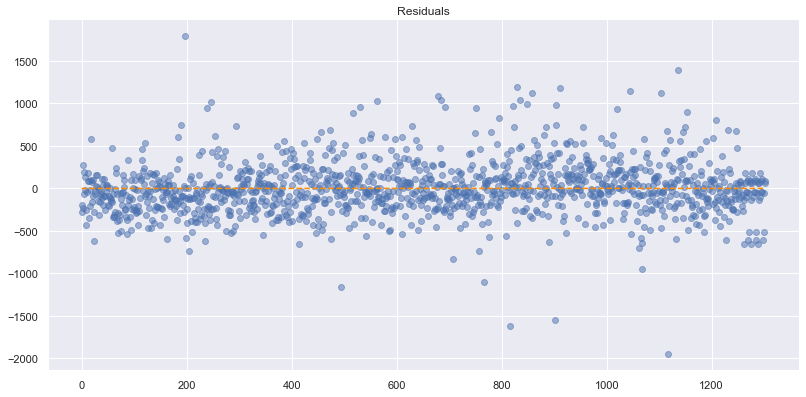

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 557.7533705758526,
 'pvalue for LM': 5.211114019409292e-96,
 'F stats': 27.113987541342397,
 'pvalue for Fstats': 3.1501096704562026e-128}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


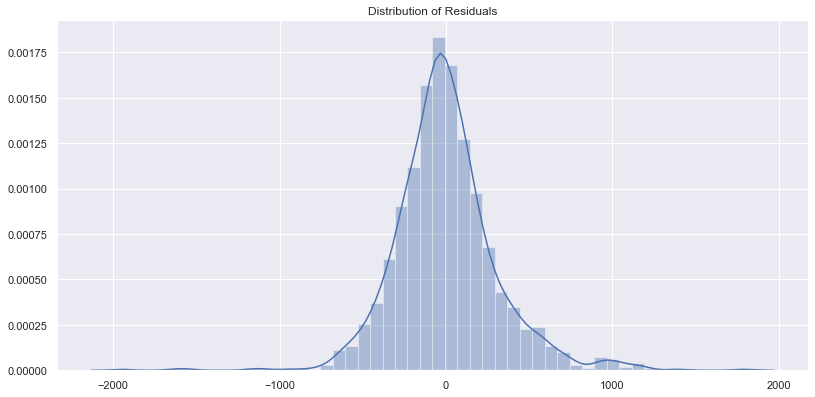


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


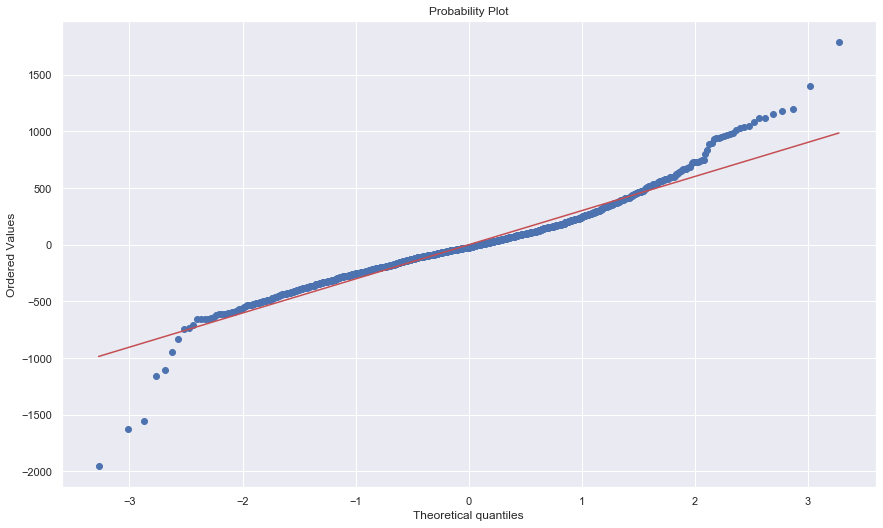


In your dataset you quite fat tails. You have 0.021 potential outliers (27 rows)


{'Satisfied': ['Autocorrelation'],
 'Potentially': ['Linearity',
  'Multicollinearity',
  'Autocorrelation',
  'Sub-Normality'],
 'Violated': ['Normality']}

In [88]:
assumptions.run_all()

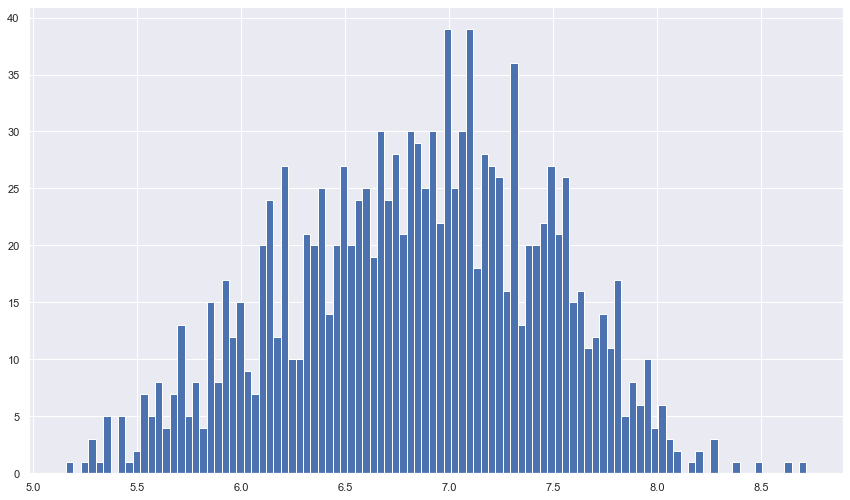

In [93]:
np.log(df.Price).hist(bins=100)

In [94]:
y1=np.log(df.Price)

In [95]:
sm.OLS(y1,add_constant(Xf)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     198.8
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        14:29:03   Log-Likelihood:                -14.971
No. Observations:                1303   AIC:                             101.9
Df Residuals:                    1267   BIC:                             288.1
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5800      0.078     84.000      0.000       6.426       6.734
0              1.9880      0.132     15.050      0.000       1.729       2.247
1              0.0664      0.074      0.892      0.373      -0.080       0.213
2             -0.0263      0.098     -0.267      0.789      -0.219       0.167
3              0.0266      0.017      1.541      0.124      -0.007       0.060
4             -0.0212      0.031     -0.675      0.500      -0.083       0.040
5              0.0166      0.042      0.392      0.695      -0.067       0.100
6              0.3425      0.046      7.493      0.000       0.253       0.432
7              0.0289      0.036      0.794      0.427      -0.043       0.100
8              0.1821      0.029      6.362      0.000       0.126       0.238
9             -0.0898      0.052     -1.734      0.083      -0.191       0.012
10             0.2043      0.061      3.356      0.001       0.085       0.324
11            -0.0221      0.057     -0.388      0.698      -0.134       0.090
12            -0.1356      0.039     -3.481      0.001      -0.212      -0.059
13             0.0413      0.038      1.101      0.271      -0.032       0.115
14             0.2013      0.086      2.349      0.019       0.033       0.369
15            -0.1589      0.059     -2.706      0.007      -0.274      -0.044
16            -0.1955      0.025     -7.792      0.000      -0.245      -0.146
17            -0.0180      0.043     -0.418      0.676      -0.102       0.066
18            -0.1046      0.073     -1.443      0.149      -0.247       0.038
19            -0.2317      0.063     -3.655      0.000      -0.356      -0.107
20            -0.3478      0.062     -5.586      0.000      -0.470      -0.226
21            -0.1212      0.053     -2.296      0.022      -0.225      -0.018
22             0.1223      0.065      1.891      0.059      -0.005       0.249
23            -0.0958      0.030     -3.142      0.002      -0.156      -0.036
24             0.1030      0.021      4.989      0.000       0.062       0.143
25             0.1141      0.038      2.991      0.003       0.039       0.189
26             0.3699      0.079      4.671      0.000       0.215       0.525
27            -0.8261      0.085     -9.761      0.000      -0.992      -0.660
28            -0.7022      0.043    -16.515      0.000      -0.786      -0.619
29             0.2415      0.138      1.753      0.080      -0.029       0.512
30            -0.2636      0.026    -10.173      0.000      -0.314      -0.213
31             0.1416      0.019      7.379      0.000       0.104       0.179
32            -0.4237      0.053     -7.987      0.000      -0.528      -0.320
33             0.0355      0.042      0.846      0.398      -0.047       0.118
34             0.1571      0.100      1.578      0.115      -0.038       0.353
==

Fitting linear regression

R^2: 0.8459393959537316 

Coefficients
-------------------------------------
Intercept: 6.579971052492549
X1: 1.99
X2: 0.07
X3: -0.03
X4: 0.03
X5: -0.02
X6: 0.02
X7: 0.34
X8: 0.03
X9: 0.18
X10: -0.09
X11: 0.2
X12: -0.02
X13: -0.14
X14: 0.04
X15: 0.2
X16: -0.16
X17: -0.2
X18: -0.02
X19: -0.1
X20: -0.23
X21: -0.35
X22: -0.12
X23: 0.12
X24: -0.1
X25: 0.1
X26: 0.11
X27: 0.37
X28: -0.83
X29: -0.7
X30: 0.24
X31: -0.26
X32: 0.14
X33: -0.42
X34: 0.04
X35: 0.16

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


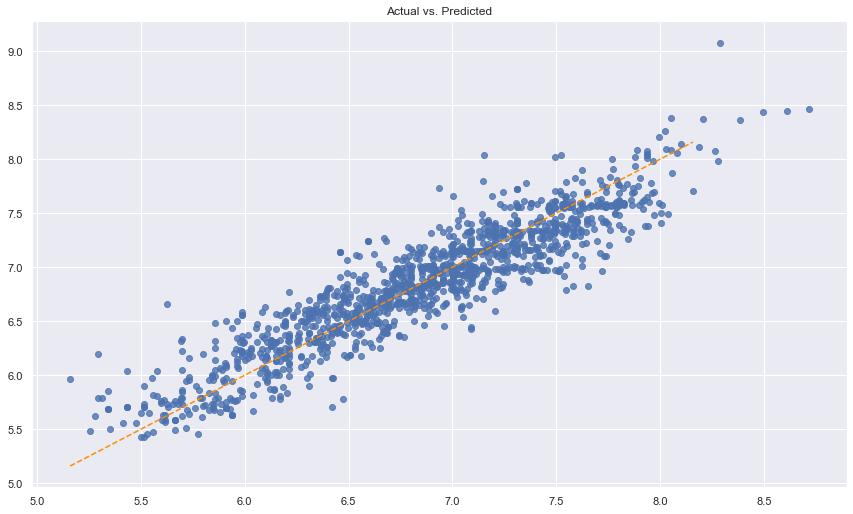

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Price


X2    0.160004
X3    0.151674
Name: Price, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with Price


X1     0.684803
X6     0.366951
X7     0.484905
X11    0.501707
Name: Price, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


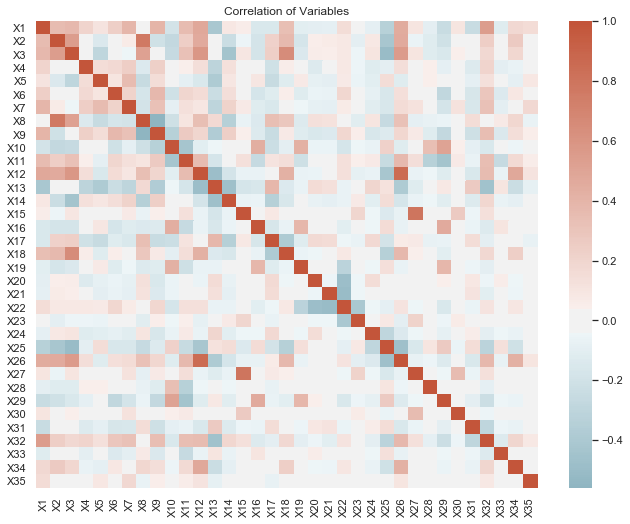

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X22: 31.07155160457613
X3: 27.72983045269171
X11: 24.77136487207192
X13: 15.228568393592747
X8: 11.819904676509982
X2: 10.88967228260976
X12: 10.534736002047389
X9: 9.840501322817312
X17: 6.791064782824965
X1: 6.390300698102446
X26: 5.617025665275065
X18: 4.891561610580787
X25: 4.393794267273475
X6: 3.609969982554217
X15: 3.3745746300452653
X14: 3.2899111560277063
X32: 3.2592283698711966
X27: 3.1506159587825855
X20: 2.949239683576331
X21: 2.930214962011738
X10: 2.7007480646438253
X7: 2.681469070837835
X5: 2.6669114684281547
X29: 2.5591744394493117
X23: 2.241133844784818
X19: 1.9573069105466305
X16: 1.7942883826444818
X4: 1.719757671311007
X34: 1.5442602173855289
X24: 1.5230513681740219
X28: 1.4764478502563094
X31: 1.4745158453797573
X33: 1.3473460559897088
X30: 1.2255765235125837
X35: 1.1265680590533078

7 

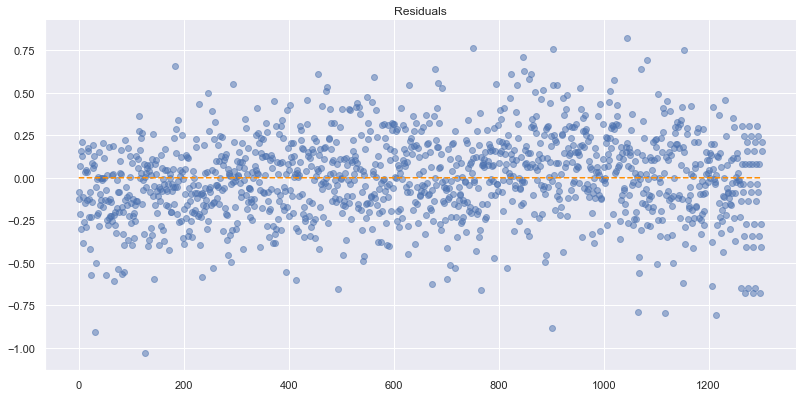

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 425.18312938932183,
 'pvalue for LM': 4.2323029851637065e-69,
 'F stats': 17.547825621747844,
 'pvalue for Fstats': 4.3848720301900454e-85}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.006800792580837533
Residuals are not normally distributed


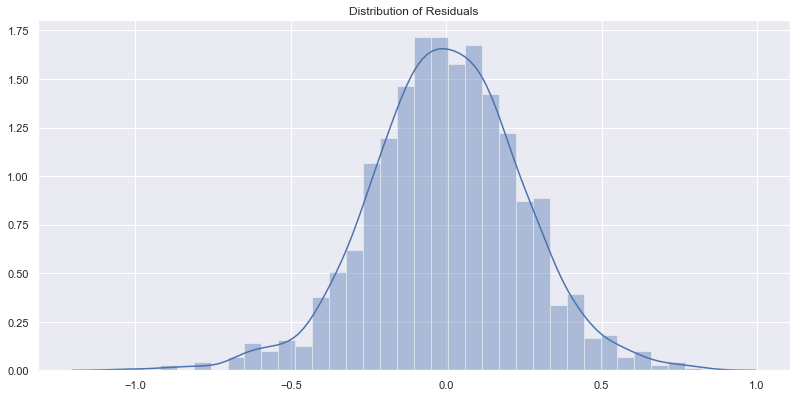


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


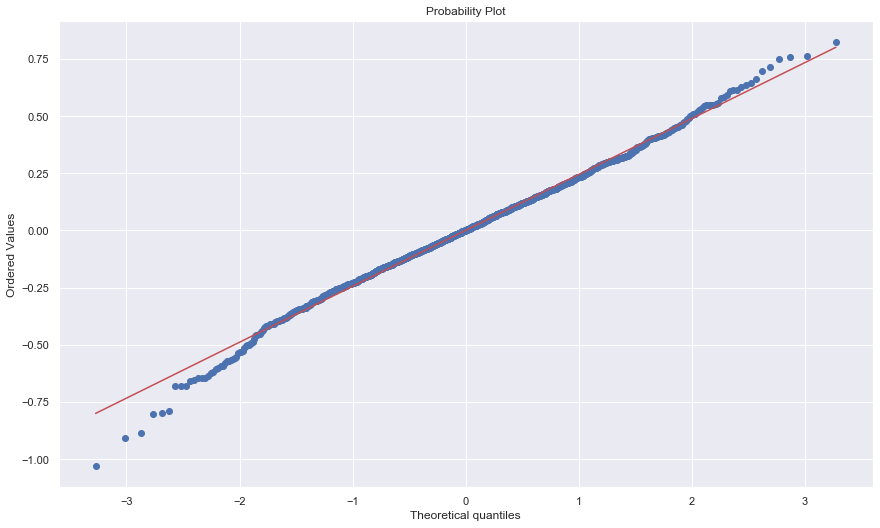


In your dataset you quite fat tails. You have 0.028 potential outliers (37 rows)


{'Satisfied': ['Autocorrelation'],
 'Potentially': ['Linearity',
  'Multicollinearity',
  'Autocorrelation',
  'Sub-Normality'],
 'Violated': ['Normality']}

In [96]:
assumptions = Assumption_Tester_OLS(X_two,y1)
assumptions.run_all()

In [97]:
from scipy import stats
y2, _ = stats.boxcox(df.Price)

((array([-3.27312823, -3.01358833, -2.86911137, ...,  2.86911137,
          3.01358833,  3.27312823]),
  array([ 7.04041215,  7.21852441,  7.25724164, ..., 14.39821843,
         14.70689085, 14.98706901])),
 (1.3635112465064603, 10.441269875179321, 0.9975769268984541))

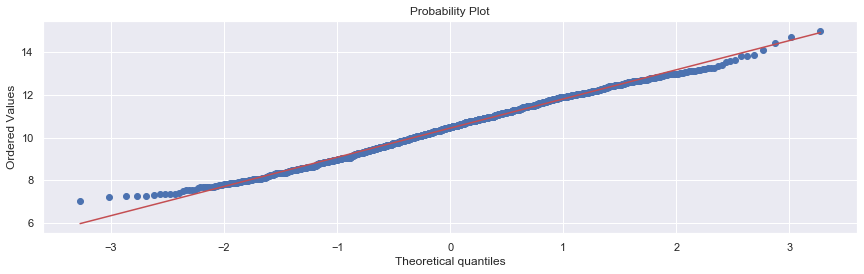

In [102]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(y2, dist=stats.norm,plot=ax1)

In [103]:
sm.OLS(y2,add_constant(Xf)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        14:41:19   Log-Likelihood:                -1040.7
No. Observations:                1303   AIC:                             2153.
Df Residuals:                    1267   BIC:                             2340.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7998      0.172     56.935      0.000       9.462      10.137
0              4.6058      0.290     15.868      0.000       4.036       5.175
1              0.1357      0.164      0.829      0.407      -0.185       0.457
2              0.0131      0.216      0.060      0.952      -0.411       0.437
3              0.0507      0.038      1.338      0.181      -0.024       0.125
4             -0.0526      0.069     -0.761      0.447      -0.188       0.083
5             -0.0098      0.093     -0.105      0.916      -0.193       0.173
6              0.7991      0.100      7.957      0.000       0.602       0.996
7              0.0610      0.080      0.763      0.446      -0.096       0.218
8              0.3950      0.063      6.281      0.000       0.272       0.518
9             -0.1862      0.114     -1.637      0.102      -0.409       0.037
10             0.4608      0.134      3.445      0.001       0.198       0.723
11            -0.0582      0.125     -0.466      0.642      -0.304       0.187
12            -0.3073      0.086     -3.589      0.000      -0.475      -0.139
13             0.0974      0.082      1.182      0.238      -0.064       0.259
14             0.4430      0.188      2.353      0.019       0.074       0.812
15            -0.3572      0.129     -2.767      0.006      -0.610      -0.104
16            -0.4395      0.055     -7.974      0.000      -0.548      -0.331
17            -0.0453      0.095     -0.479      0.632      -0.231       0.140
18            -0.2289      0.159     -1.437      0.151      -0.541       0.084
19            -0.4857      0.139     -3.487      0.001      -0.759      -0.212
20            -0.7257      0.137     -5.305      0.000      -0.994      -0.457
21            -0.2486      0.116     -2.144      0.032      -0.476      -0.021
22             0.2909      0.142      2.047      0.041       0.012       0.570
23            -0.1947      0.067     -2.905      0.004      -0.326      -0.063
24             0.2352      0.045      5.185      0.000       0.146       0.324
25             0.2493      0.084      2.973      0.003       0.085       0.414
26             0.8673      0.174      4.985      0.000       0.526       1.209
27            -1.6401      0.186     -8.819      0.000      -2.005      -1.275
28            -1.4032      0.093    -15.019      0.000      -1.587      -1.220
29             0.6098      0.303      2.014      0.044       0.016       1.204
30            -0.5503      0.057     -9.665      0.000      -0.662      -0.439
31             0.3101      0.042      7.354      0.000       0.227       0.393
32            -0.8621      0.117     -7.395      0.000      -1.091      -0.633
33             0.0901      0.092      0.977      0.329      -0.091       0.271
34             0.4540      0.219      2.075      0.038       0.025       0.883
==